In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# the specifications are for jupyter earth - sun system
R_planet = 70000
R_star = 695842
angle = np.pi/2
P = 1  
a = 400000000
ratio_of_mass = 1/1000  #ratio of planet to star mass , data taken as ratio of jupiter to sun
angle_of_orbit = 50*np.pi/180

In [3]:
#first lets assume the orbit is circular and its a two body problem
# COM = M_planet*a/(M_planet + M_star) 
# COM is measured from stars center
COM = a/(1+(1/ratio_of_mass))
b = a*np.cos(angle)
R_len= ((R_star)**2 - b**2)**0.5
V_star = 2*np.pi*COM/P
omega = 2*np.pi/P

transit_t = (P/np.pi)*np.arcsin((((R_star + R_planet)**2 - (a*np.cos(angle))**2)**0.5)/(a*np.sin(angle)))
print(transit_t)

0.0006094380719747433


In [4]:
def r_vel(t):
    omega = 2*np.pi/P
    V = 2*np.pi*COM*np.sin(angle)/P
    r_v = V*np.sin(omega*t)          # at t=0 the star is at the the periastron no relative velocity along the line of sight  
    return r_v


In [5]:
t1 = np.arange(0,3*P,P/1000)
v = []
for i in t1:
    v.append(r_vel(i)/(365*24*3600)) #just converting km/year to km/s.

Text(0, 0.5, 'velocity in km/s')

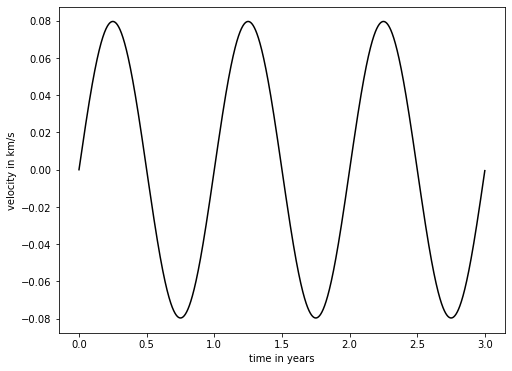

In [6]:
plt.figure(figsize=(8,6))
plt.plot(t1,v,'k')
plt.xlabel('time in years')
plt.ylabel('velocity in km/s')

In [7]:
def x_dist(t1,t2):
    V_planet = 2*np.pi*a/P 
    return -V_planet*(np.sin(omega*t1+np.pi)-np.sin(omega*t2+np.pi))/omega

def area(x):
    alpha = np.arccos((R_planet-x)/R_planet)
    A = alpha*R_planet**2 - R_planet*np.sin(alpha)*(R_planet-x)
    return A

In [8]:
#calculating red_shift
def r_shift(v):
    c= 3*10**8
    z = ((1+ (v/c))/(1 - (v/c)))**0.5 -1 
    return z


#including rotation
#assuming star as a sphere having fixed rotation period

P_rot_star = 26/365               # in yrs   
omega_rot = 2*np.pi/P_rot_star

#calculating velocity as function of latitude , longitude of star 
 
def velocity(alpha, theta,t):
    vel_rot = -omega_rot*R_star*np.cos(theta)*np.cos(alpha)
    vel_rev = r_vel(t)
    v = vel_rot + vel_rev
    return v 

#as we have defined velocity of every point on star we need to find avg vel over disc surface
def avg_vel(t,A,x):
    #we know that avg velocity equals velocity of COM but when the planet transit we have some surfave velocity covered by 
    #planet so we subtract that from COM velocity
   
    o = angle_of_orbit
    
    H = (R_len)*np.sin(o)-b*np.cos(o)
    

    h = (R_len-x+R_planet)*np.sin(o)-b*np.cos(o)
    
    R_disc = (R_star**2 - h**2)**0.5
    y = R_star - (R_star**2 - H**2)**0.5 + (x-R_planet)*np.cos(o)
    
    
    if ((-y+R_star)/R_disc) < 1 and ((-y+R_star)/R_disc)>-1 :
        alpha = np.arccos((-y+R_star)/R_disc)
    
    elif x<2*R_planet:
        alpha = 0
      
        
    else:
        alpha = np.pi
      
     
    theta = np.arcsin(h/R_star)
    
        
    v = velocity(alpha,theta,t)
    vel_covered = A*v/(np.pi*R_star**2)
    avg_vel = r_vel(t) - vel_covered
    return avg_vel



R_len = ((R_star)**2 - b**2)**0.5

In [13]:
t= np.arange(0,P,P/1000000) #here you can change limits to adjust time interval
vel = []
s=0
x=0
for time in t:
    
    if time < 0.5*P:
        vel.append(r_vel(time))
        s=s+1
    elif time>=0.5*P and x <2*R_len + 2*R_planet:
        x = x_dist(0.5*P,time)  
        
       
        if x < 2*R_planet:
            A = area(x)
            vel.append(avg_vel(time,A,x))
          
            
        elif x>=2*R_planet and x<2*R_len:
            A = np.pi*R_planet**2
            vel.append(avg_vel(time,A,x))
            
        elif x>=2*R_len and x<2*R_len + 2*R_planet:
            A = area(2*R_len + 2*R_planet - x)
            vel.append(avg_vel(time,A,x))
        else:
            vel.append(r_vel(time))

        
    else:
        vel.append(r_vel(time))
        
for v in range (0,len(vel),1):
    vel[v]= vel[v]/(365*24*3600)

Text(0, 0.5, 'radial velocity (km/s)')

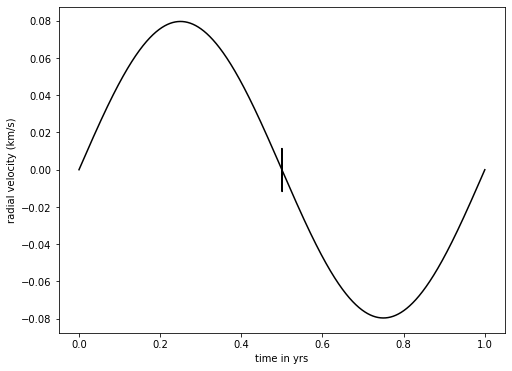

In [14]:
plt.figure(figsize=(8,6))
plt.plot(t,vel,'k')
plt.xlabel('time in yrs')
plt.ylabel('radial velocity (km/s)')

(0.498, 0.502)

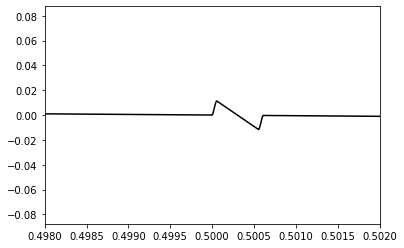

In [19]:
plt.plot(t,vel,'k')
plt.xlim(0.498*P,0.502*P)